# Jeu de données ENGIE

In [ ]:
# !pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des jeux de données

In [3]:
df = pd.read_excel('./njmaint1000.xlsx')

In [4]:
df.head(5)

,MAIN_PK,MAIN_DATE,ITEM_PK,CLAS_PK,TIME,ATT_DATE,STAFF,REPORT,WORK_DES,CARAC,...,DESC6,DESC7,DESC8,CREATED_DATE,RESPONSIBLE_NUM,NEED_PERMIT2,NO_PERMIT2,RE_COMMISSIONING_DATE,FLAG_PLANNED,USER_NAME
0,625309,2020-01-03 16:00:00,486980,NaN,7.0,2020-01-03 08:37:00,NaN,Arnaud et Thierry 2h + 2h\r\n\r\nRemplacement ...,DEUX NEONS HS AU SS-2,B,...,NaN,NaN,NaN,2020-01-03 08:38:14,NaN,N,NaN,NaT,NaN,PCAM_MCR
1,625317,NaT,479796,NaN,NaN,2020-01-03 09:16:00,NaN,NaN,D934 DEFAUT D ECLAIRAGE /DU 1ER ROND POINT JUS...,B,...,NaN,NaN,NaN,2020-01-03 09:16:00,NaN,NaN,NaN,NaT,NaN,NaN
2,625354,2020-02-03 12:00:00,556987,NaN,28.5,2020-01-03 11:40:00,NaN,PTR1 Ond2 : Test des flottements\r\nDéfaut d'i...,DEFAUT D ISOLEMENT SUR ONDULEURS 1.1/ 2.1/.5.2,B,...,NaN,NaN,NaN,2020-01-03 10:11:39,NaN,N,NaN,2020-02-03 12:00:00,NaN,ADM_PESS1
3,508825,2019-02-01 08:00:00,466816,NaN,NaN,2019-01-06 00:11:59,NaN,NaN,DEFAUT SYSTÈME SUR SSI,B,...,NaN,NaN,NaN,2019-01-06 00:11:59,NaN,NaN,NaN,NaT,NaN,NaN
4,508834,2019-01-06 06:48:08,481840,NaN,NaN,2019-01-06 06:48:08,NaN,NaN,ALARME CP 01009 SYNTHÈSE DEFAUT BAT 15 LOCAL 1901,B,...,NaN,NaN,NaN,2019-01-06 06:48:08,NaN,N,NaN,2019-01-06 06:48:08,NaN,MPLR_ALO


## Verification des lignes problématiques

In [10]:
df.isna().sum().sort_values(ascending=False)

EQU_STOP_TIME        1000
CLIENT_EXPENSE_PK    1000
BUD_CODE             1000
ORDER_CODE           1000
BUD_CODE_EQU         1000
                     ... 
CLIENT_PK               0
HOT_WORK                0
CREATED_DATE            0
ITEM_PK                 0
MAIN_PK                 0
Length: 69, dtype: int64

In [11]:
columns = ['MAIN_PK','CATEGORY_PK','STATUS_PK']
new_df = df.loc[:,columns]
new_df

,MAIN_PK,CATEGORY_PK,STATUS_PK
0,625309,K,8
1,625317,K,4
2,625354,K,H
3,508825,K,4
4,508834,K,8
...,...,...,...
995,482886,L,9
996,492637,L,7
997,496111,L,7
998,496113,L,7


## Convertion des valeurs litterales en numériques

In [13]:
from sklearn.preprocessing import LabelEncoder

for column in list(new_df.describe(exclude=[np.number]).columns):
    le = LabelEncoder()
    le.fit(new_df[column])
    new_df[column + '_']=le.transform(new_df[column])
new_df

,MAIN_PK,CATEGORY_PK,STATUS_PK,CATEGORY_PK_,STATUS_PK_
0,625309,K,8,3,5
1,625317,K,4,3,2
2,625354,K,H,3,12
3,508825,K,4,3,2
4,508834,K,8,3,5
...,...,...,...,...,...
995,482886,L,9,4,6
996,492637,L,7,4,4
997,496111,L,7,4,4
998,496113,L,7,4,4


## Selection des "colonnes utiles"

In [14]:
new_df = new_df.drop(['CATEGORY_PK','STATUS_PK'], 1)
new_df

,MAIN_PK,CATEGORY_PK_,STATUS_PK_
0,625309,3,5
1,625317,3,2
2,625354,3,12
3,508825,3,2
4,508834,3,5
...,...,...,...
995,482886,4,6
996,492637,4,4
997,496111,4,4
998,496113,4,4


## Mise à l'échelle des valeurs

In [17]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [18]:
min_max = MinMaxScaler()
new_df_minmax = min_max.fit_transform(new_df)
new_df_minmax

array([[0.67901048, 0.23076923, 0.38461538],
       [0.67902389, 0.23076923, 0.15384615],
       [0.67908589, 0.23076923, 0.92307692],
       ...,
       [0.46250268, 0.30769231, 0.30769231],
       [0.46250603, 0.30769231, 0.30769231],
       [0.47706021, 0.30769231, 0.30769231]])

Avant la mise à l'échelle on obtient ça 

<AxesSubplot:>

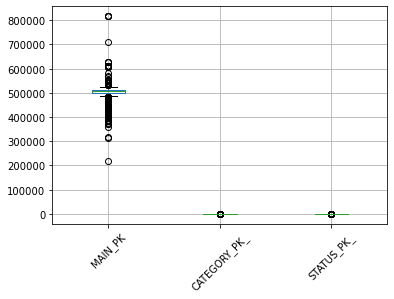

In [20]:
new_df.boxplot(rot=45)

Après la mise à l'échelle on obtient ça :

<AxesSubplot:>

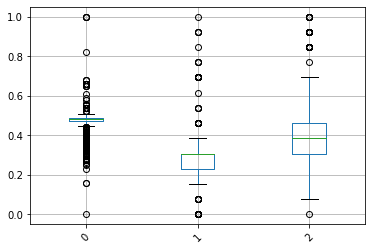

In [21]:
 pd.DataFrame(new_df_minmax).boxplot(rot=45)

In [23]:
new_df.STATUS_PK_.value_counts().sort_index(ascending=True)

0       1
1       8
2      64
3       1
4     381
5      65
6     361
7       1
8      33
9      20
10      1
11     20
12     37
13      7
Name: STATUS_PK_, dtype: int64

## Clusterisation

In [ ]:
##df['CATEGORY_PK'].unique()

In [26]:
from sklearn import cluster
kmeans_minmax = cluster.KMeans(n_clusters=3, random_state=42)
# kmeans_minmax
kmeans_minmax.fit(new_df_minmax)

KMeans(n_clusters=3, random_state=42)

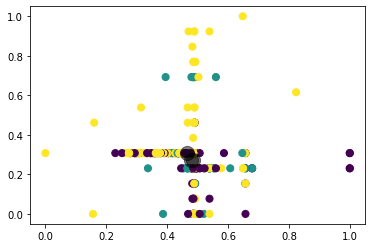

In [27]:
y_kmeans = kmeans_minmax.predict(new_df_minmax)
# y_kmeans
centers = kmeans_minmax.cluster_centers_
# centers
# plt.figure()
plt.scatter(new_df_minmax[ : , 0], new_df_minmax[ : , 1], c=y_kmeans, s=50, cmap='viridis')
# colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) 

## Recherche du nombre optimal de clusters

*** For n_clusters=2, The Silhouette Coefficient is 0.6126581632469449 ***

*** For n_clusters=3, The Silhouette Coefficient is 0.4559909270772523 ***

*** For n_clusters=4, The Silhouette Coefficient is 0.48777508494732924 ***

*** For n_clusters=5, The Silhouette Coefficient is 0.5165582601999918 ***

*** For n_clusters=6, The Silhouette Coefficient is 0.526411359289094 ***

*** For n_clusters=7, The Silhouette Coefficient is 0.56094210937868 ***

*** For n_clusters=8, The Silhouette Coefficient is 0.5777860845518449 ***

*** For n_clusters=9, The Silhouette Coefficient is 0.5869015334356443 ***

*** For n_clusters=10, The Silhouette Coefficient is 0.6128133940252324 ***

[0.6126581632469449, 0.4559909270772523, 0.48777508494732924, 0.5165582601999918, 0.526411359289094, 0.56094210937868, 0.5777860845518449, 0.5869015334356443, 0.6128133940252324]


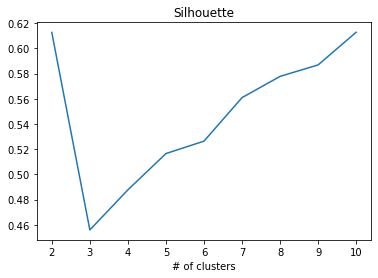

In [28]:
from sklearn import metrics

# Utilisation de la métrique "silhouette"
# Faire varier le nombre de clusters de 2 à 10
scores = []
for k in range(2, 11):
    km = cluster.KMeans(n_clusters = k, random_state = 42)
    km.fit(new_df_minmax)
    score = metrics.silhouette_score(new_df_minmax, km.labels_)
    scores.append(score)
    print(f'*** For n_clusters={k}, The Silhouette Coefficient is {score} ***\n')

print(scores)
# S :
# [0.46125628440580635, 0.40294238189905895, 0.41627447069733386, 0.3900272705972848, 0.3228464903008829, 0.3473776041463943, 0.3412276622157032, 0.25028718369271796, 0.22147311807421863]

# Graphique
plt.figure()
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(range(2, 11, 1), scores)

Le nombre optimal de clusters est de 3.

In [33]:
#kmeans_minmax.labels_

## Classifiication du texte (NLP)

In [34]:
columns = ['MAIN_DATE','REPORT','WORK_DES']
new_df2 = df.loc[:,columns]
new_df2

,MAIN_DATE,REPORT,WORK_DES
0,2020-01-03 16:00:00,Arnaud et Thierry 2h + 2h\r\n\r\nRemplacement ...,DEUX NEONS HS AU SS-2
1,NaT,NaN,D934 DEFAUT D ECLAIRAGE /DU 1ER ROND POINT JUS...
2,2020-02-03 12:00:00,PTR1 Ond2 : Test des flottements\r\nDéfaut d'i...,DEFAUT D ISOLEMENT SUR ONDULEURS 1.1/ 2.1/.5.2
3,2019-02-01 08:00:00,NaN,DEFAUT SYSTÈME SUR SSI
4,2019-01-06 06:48:08,NaN,ALARME CP 01009 SYNTHÈSE DEFAUT BAT 15 LOCAL 1901
...,...,...,...
995,2019-03-06 08:00:00,Maintenance électrique trimestrielle. \r\nRas,NANTES-CFO-ARMOIRES DIVISIONNAIRES-TRIMESTRIEL...
996,2019-09-05 16:15:00,Maintenance preventive des installations élect...,Visite annuelle avec coupure du site DARTY
997,2019-02-13 12:00:00,Essais réel\r\nCoupure de la référence tension...,02-ESSAIS-GE-REEL-FEVRIER
998,2019-04-10 12:00:00,Essais mensuel sur simulation perte référencé ...,04-ESSAIS-GE-REEL-AVRIL


## Avec Spacy :

In [35]:
!pip install spacy
!python -m spacy download fr_core_news_sm

[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [40]:
import spacy

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("fr_core_news_sm")

# Process whole documents
text = ("Réglage barre palpeuse. Interphone carte et commande ouverture forcée. Essai ok")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc:
    print(entity.text, entity.pos_, entity.dep_)

Noun phrases: ['Réglage barre palpeuse.', 'Interphone carte et commande ouverture forcée.', 'Essai']
Verbs: ['forcer']
Réglage NOUN ROOT
barre ADJ amod
palpeuse ADJ amod
. PUNCT punct
Interphone NOUN ROOT
carte NOUN nmod
et CCONJ cc
commande PROPN conj
ouverture NOUN nmod
forcée VERB acl
. PUNCT punct
Essai NOUN nsubj
ok CCONJ ROOT


### Avec Spark (Idée abandonnée)

In [ ]:
#!bash wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

In [ ]:
pip install pyspark

In [ ]:
pip install sparknlp

In [ ]:
import json

import pyspark
from pyspark.ml import Pipeline 
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from sparknlp.annotator import *
from sparknlp.base import *

import sparknlp
from sparknlp.pretrained import PretrainedPipeline

In [ ]:
spark = sparknlp.start()

In [ ]:
sparknlp.version()
spark.version

In [ ]:
model_name ='classified_fake_report'

In [ ]:
columns = ['REPORT','WORK_DES']
new_df_text_list = new_df2.loc[:,columns]

In [ ]:
np.array(new_df_text_list)

In [ ]:
#NPL Pipline
documentAssembler = DocumentAssembler()\
.setInputCol("text")



documentAssembler.setOutputCol("document")

try:
    use = UniversalSentenceEncoder.pretrained(lang="fr")\
    .setInputCols(["document"])\
    .setOutputCol("sentence_embeddings")
except:
    pass

document_classifier = ClassifierDLModel.pretrained(model_name)\
    .setInputCols(['document', 'sentence_embeddings']).setOutputCol("class")

nlpPipline = Pipline(stage=[
    documentAssembler,
    use,
    document_classifier
])